# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands-on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

- Use the `.map()` and `.apply()` methods to apply a function to a pandas Series or DataFrame 
- Perform operations to change the structure of pandas DataFrames 
- Change the index of a pandas DataFrame 
- Change data types of columns in pandas DataFrames 

## Let's get started! 

Import the file `'turnstile_180901.txt'`. 

In [141]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [142]:
# Import the file 'turnstile_180901.txt'
df = pd.read_csv('turnstile_180901.txt')

# Print the number of rows ans columns in df
print(df.shape)

# Print the first five rows of df
df.head()

(197625, 11)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


Rename all the columns to lower case: 

In [143]:
# Rename all the columns to lower case
for i in range(len(df.columns)):
    df = df.rename(columns={df.columns[i] : df.columns[i].lower()})
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

Change the index to `'linename'`: 

In [144]:
# Change the index to 'linename'
df = df.set_index('linename')
df.head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


Reset the index: 

In [145]:
# Reset the index
df = df.reset_index()
df.head(3)

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229


Create another column `'Num_Lines'` that is a count of how many lines pass through a station. Then sort your DataFrame by this column in descending order. 

*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [146]:
# Add a new 'num_lines' column
df['Num_Lines'] = df['linename'].str.len()

In [147]:
df = df.sort_values(by=['Num_Lines'], ascending = False)
print(df['Num_Lines'].unique())
df.head(5)

[12 11  9  8  7  6  5  4  3  2  1]


,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines
132292,1237ACENQRSW,R151,R033,00-00-00,TIMES SQ-42 ST,IRT,08/30/2018,00:00:00,REGULAR,1417952,3267016,12
2686,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/29/2018,16:00:00,REGULAR,2836145,3311412,12
2673,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/27/2018,16:00:00,REGULAR,2830710,3305818,12
2674,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/27/2018,20:00:00,REGULAR,2832048,3306310,12
2675,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,08/28/2018,00:00:00,REGULAR,2832325,3306433,12


In [148]:
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               ',
       'Num_Lines'],
      dtype='object')

Write a function to clean column names: 

In [162]:
def clean(col_name):
    # Clean the column name in any way you want to. Hint: think back to str methods 
    cleaned = col_name.strip()
    return cleaned

test = 'zyx    '
clean(test)

'zyx'

In [151]:
# Use the above function to clean the column names
for i in range(len(df.columns)):
    df = df.rename(columns={df.columns[i] : clean(df.columns[i])})

In [152]:
# Check to ensure the column names were cleaned
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'Num_Lines'],
      dtype='object')

- Change the data type of the `'date'` column to a date 
- Add a new column `'day_of_week'` that represents the day of the week

In [153]:
df['date'].dtype

dtype('O')

In [154]:
# Convert the data type of the 'date' column to a date
df['date'] = pd.to_datetime(df['date'])

# Add a new column 'day_of_week' that represents the day of the week 
df['day_of_week'] = df['date'].dt.day_name()
df.head()

,linename,c/a,unit,scp,station,division,date,time,desc,entries,exits,Num_Lines,day_of_week
132292,1237ACENQRSW,R151,R033,00-00-00,TIMES SQ-42 ST,IRT,2018-08-30,00:00:00,REGULAR,1417952,3267016,12,Thursday
2686,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,2018-08-29,16:00:00,REGULAR,2836145,3311412,12,Wednesday
2673,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,2018-08-27,16:00:00,REGULAR,2830710,3305818,12,Monday
2674,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,2018-08-27,20:00:00,REGULAR,2832048,3306310,12,Monday
2675,ACENQRS1237W,A021,R032,01-00-01,TIMES SQ-42 ST,BMT,2018-08-28,00:00:00,REGULAR,2832325,3306433,12,Tuesday


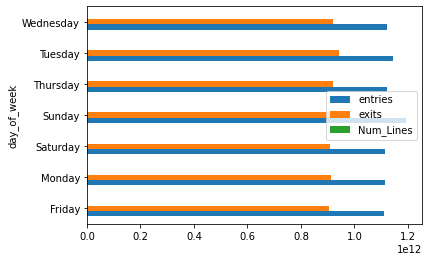

In [155]:
# Group the data by day of week and plot the sum of the numeric columns
grouped = df.groupby('day_of_week').sum()
grouped.plot(kind='barh')
plt.show()

- Remove the index of `grouped` 
- Print the first five rows of `grouped` 

In [156]:
grouped.head()

,entries,exits,Num_Lines
day_of_week,,,
Friday,1110224700078,906799065337,75573
Monday,1114237052454,911938153513,76110
Saturday,1115661545514,909142081474,74725
Sunday,1192306179082,959223750461,75306
Thursday,1122723988662,920691927110,76607


In [157]:
# Reset the index of grouped
grouped = grouped.reset_index()

# I think the explanation above is misleading regarding reseting the index.
grouped['day_of_week'] = grouped.index.values

# Print the first five rows of grouped
grouped.iloc[0:5]

,day_of_week,entries,exits,Num_Lines
0,0,1110224700078,906799065337,75573
1,1,1114237052454,911938153513,76110
2,2,1115661545514,909142081474,74725
3,3,1192306179082,959223750461,75306
4,4,1122723988662,920691927110,76607


Add a new column `'is_weekend'` that maps the `'day_of_week'` column using the dictionary `weekend_map` 

In [158]:
# Use this dictionary to create a new column 
weekend_map = {0:False, 1:False, 2:False, 3:False, 4:False, 5:True, 6:True}

# Add a new column 'is_weekend' that maps the 'day_of_week' column using weekend_map
grouped['is_weekend'] = grouped['day_of_week'].map(weekend_map)
grouped.head()

,day_of_week,entries,exits,Num_Lines,is_weekend
0,0,1110224700078,906799065337,75573,False
1,1,1114237052454,911938153513,76110,False
2,2,1115661545514,909142081474,74725,False
3,3,1192306179082,959223750461,75306,False
4,4,1122723988662,920691927110,76607,False


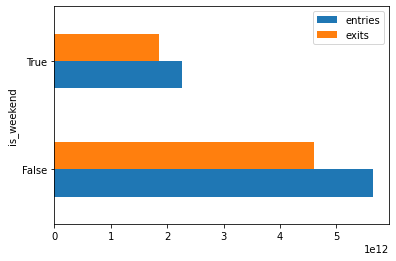

In [159]:
# Group the data by weekend/weekday and plot the sum of the numeric columns
wkend = grouped.groupby('is_weekend').sum()
wkend[['entries', 'exits']].plot(kind='barh')
plt.show()

Remove the `'c/a'` and `'scp'` columns. 

In [160]:
# Remove the 'c/a' and 'scp' columns
df = df.drop(columns= ['c/a', 'scp'], axis=1)
df.head(2)

,linename,unit,station,division,date,time,desc,entries,exits,Num_Lines,day_of_week
132292,1237ACENQRSW,R033,TIMES SQ-42 ST,IRT,2018-08-30,00:00:00,REGULAR,1417952,3267016,12,Thursday
2686,ACENQRS1237W,R032,TIMES SQ-42 ST,BMT,2018-08-29,16:00:00,REGULAR,2836145,3311412,12,Wednesday


## Analysis Question 

What is misleading about the day of week and weekend/weekday charts you just plotted?

In [161]:
# Your answer here 
#The magnitude is different.

## Summary

Great! You practiced your data cleanup skills using Pandas.